In [1]:
# good accuracy for 0 and 1
# class balanced
# classification model
# Feature Selection - RFE, DT, RF
# High accyracy, high TPR, low FPR

In [2]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')

In [5]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\GitHub_projects\\IITR\\Nicholas_Dsouza_Assignments'

# Problem statement

# Data Acquisition

In [6]:
df = pd.read_csv("Attrition-1.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
print("Number of Rows:" , df.shape[0])
print("Number of Columns:" , df.shape[1])

Number of Rows: 1470
Number of Columns: 35


In [9]:
categorical = list(df.select_dtypes(include="object").columns)
print("Categorical features:\n", categorical)
print("\n")
numerical = list(df.select_dtypes (exclude = "object").columns)
print ("Continous features:\n", numerical)

Categorical features:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Continous features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Five point Summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
# Five point Summary of cattegorical attributes
df.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


# Data Preparation

## Null Values

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [14]:
# As we have seen, that there are no Null values in the dataset 

# Univariate Analysis

## Converting Categoric to Numeric

In [15]:
for i in df.describe(include="object"):
    print(" ")
    print("**********",i,"**********")
    print(df[i].value_counts(normalize=True)*100)
    print(" ")

 
********** Attrition **********
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64
 
 
********** BusinessTravel **********
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64
 
 
********** Department **********
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64
 
 
********** EducationField **********
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: EducationField, dtype: float64
 
 
********** Gender **********
Male      60.0
Female    40.0
Name: Gender, dtype: float64
 
 
********** JobRole **********
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare 

In [16]:
# Nominal: Attrition, MaritalStatus, Department, EducationField, Gender, JobRole, Over18, OverTime 
# Ordinal: BusinessTravel

# We will use One Hot Encoding to handle Nominal data, as we dont want to induce order to the data using Label Encoding
# The only feature which is Ordinal is BusinessTravel which we will handle using Label Encoding
# Either Nominal or Ordinal data, we can use replace() to handle dichotomous categorical data

C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

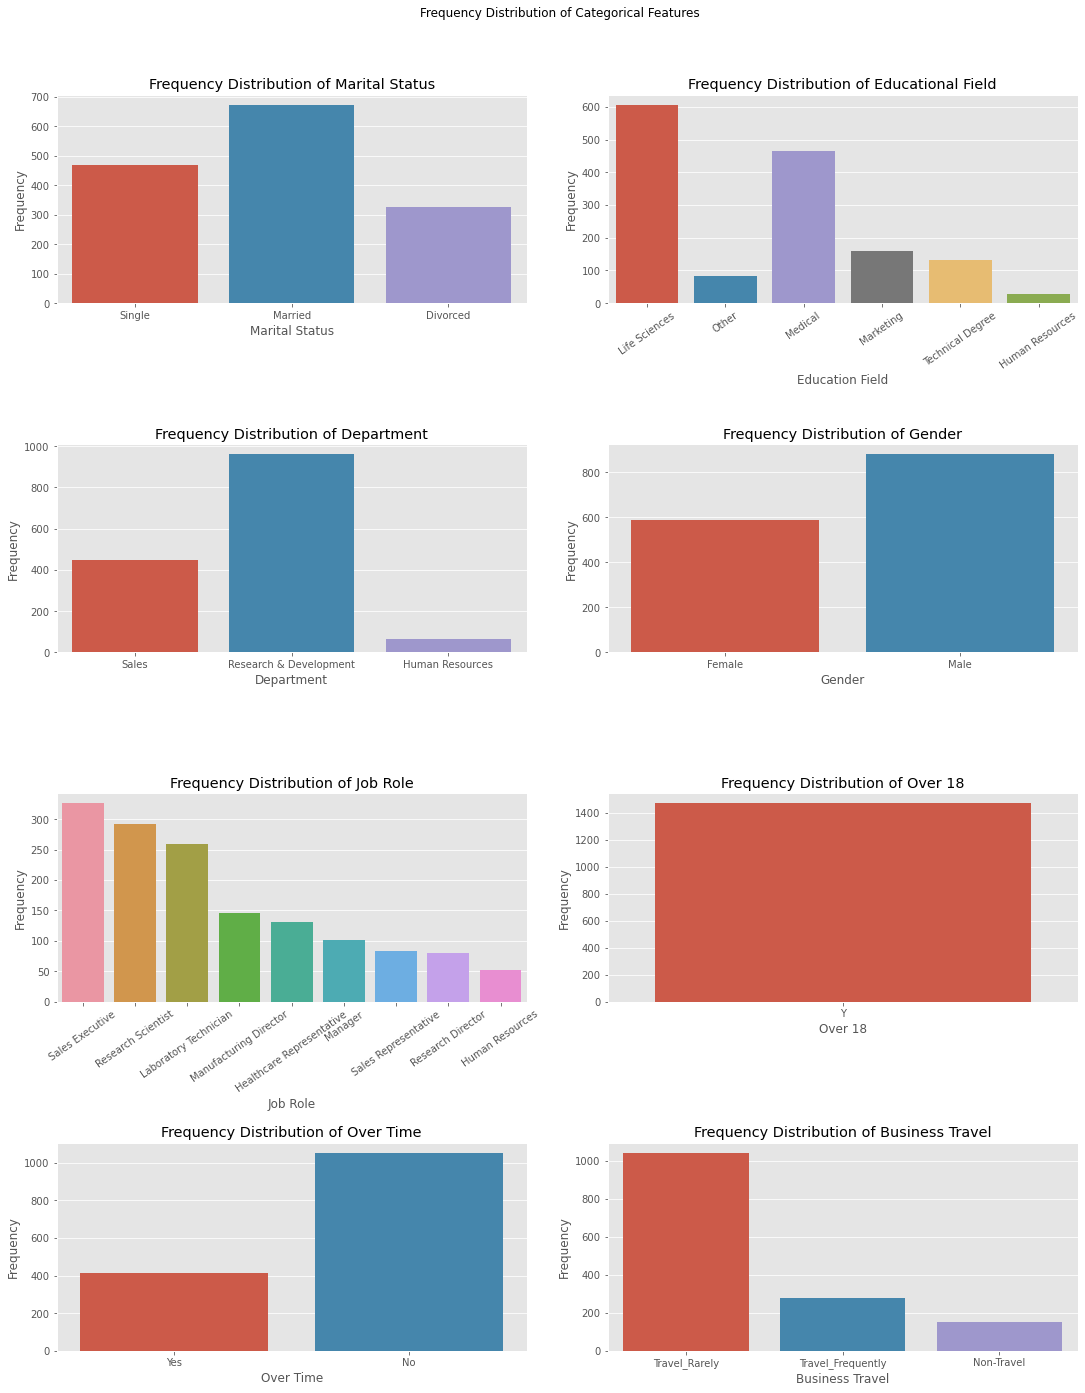

In [17]:
fig, ax= plt.subplots(4,2,figsize=(16,20))

plt.suptitle("Frequency Distribution of Categorical Features")

plt.tight_layout(pad=5, h_pad=12)

sns.countplot(df['MaritalStatus'], ax=ax[0][0])
ax[0][0].set_xlabel('Marital Status')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title('Frequency Distribution of Marital Status')

sns.countplot(df['EducationField'], ax=ax[0][1])
ax[0][1].set_xlabel('Education Field')
ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title('Frequency Distribution of Educational Field')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation="35")


sns.countplot(df['Department'], ax=ax[1][0])
ax[1][0].set_xlabel('Department')
ax[1][0].set_ylabel('Frequency',size=12)
ax[1][0].set_title('Frequency Distribution of Department')

sns.countplot(df['Gender'], ax=ax[1][1])
ax[1][1].set_xlabel('Gender')
ax[1][1].set_ylabel('Frequency',size=12)
ax[1][1].set_title('Frequency Distribution of Gender')

sns.countplot(df['JobRole'], ax=ax[2][0])
ax[2][0].set_xlabel('Job Role')
ax[2][0].set_ylabel('Frequency',size=12)
ax[2][0].set_title('Frequency Distribution of Job Role')
ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation="35")

sns.countplot(df['Over18'], ax=ax[2][1])
ax[2][1].set_xlabel('Over 18')
ax[2][1].set_ylabel('Frequency',size=12)
ax[2][1].set_title('Frequency Distribution of Over 18')

sns.countplot(df['OverTime'], ax=ax[3][0])
ax[3][0].set_xlabel('Over Time')
ax[3][0].set_ylabel('Frequency',size=12)
ax[3][0].set_title('Frequency Distribution of Over Time')

sns.countplot(df['BusinessTravel'], ax=ax[3][1])
ax[3][1].set_xlabel('Business Travel')
ax[3][1].set_ylabel('Frequency',size=12)
ax[3][1].set_title('Frequency Distribution of Business Travel')

plt.show()

Insights from Categoric Predictors:
* Majority of the employees are Married followed by single marital status. 
* Most of the employees are from the Life Sciences and Medical sector and the least number of employees are from the HR department.
* Looks like most of the employees work in the R&D department in the organization followed by Sales. Least number of employees from the HR departemnt in the survey.
* Males are the ones who are in majority.
* The job roles of employees mostly comprise of Sales, research scientist and lab technicians and few people from management.
* All the employees aree above 18 years.
* Most people do not work overtime.
* Most employees travel rarely.

---------- Age ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


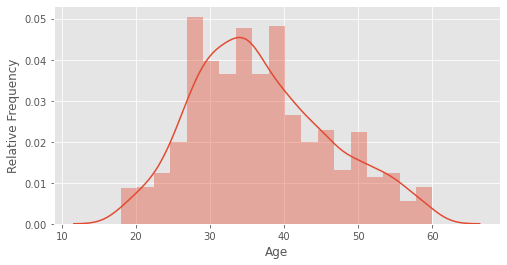

Mean:  36.923809523809524
Median:  36.0

---------- DailyRate ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


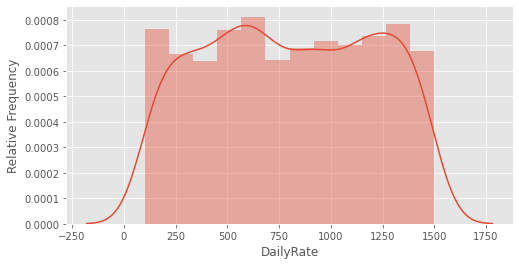

Mean:  802.4857142857143
Median:  802.0

---------- DistanceFromHome ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


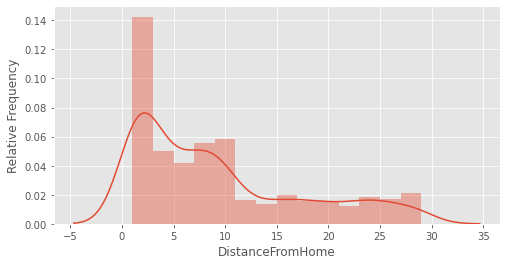

Mean:  9.19251700680272
Median:  7.0

---------- Education ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


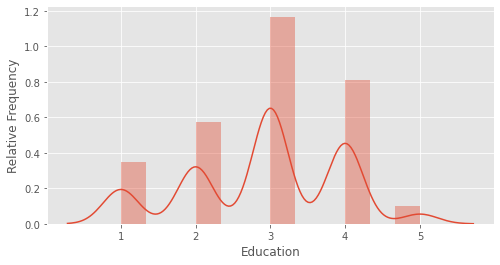

Mean:  2.912925170068027
Median:  3.0

---------- EmployeeCount ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


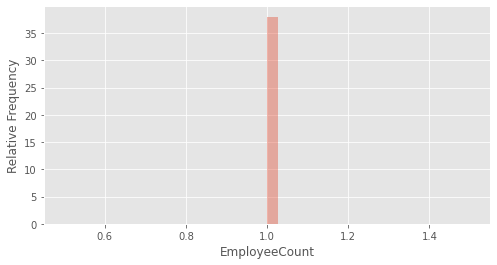

Mean:  1.0
Median:  1.0

---------- EmployeeNumber ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


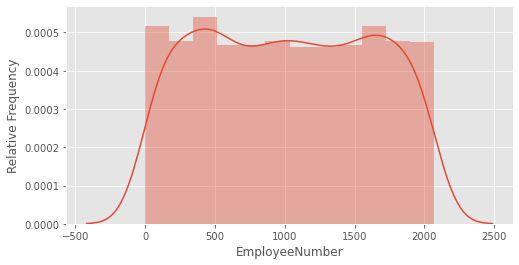

Mean:  1024.865306122449
Median:  1020.5

---------- EnvironmentSatisfaction ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


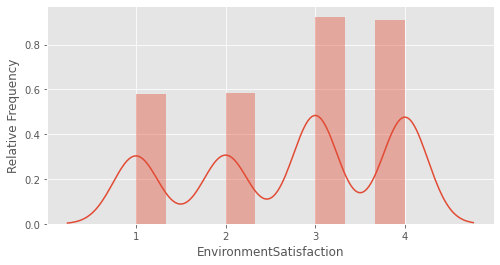

Mean:  2.721768707482993
Median:  3.0

---------- HourlyRate ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


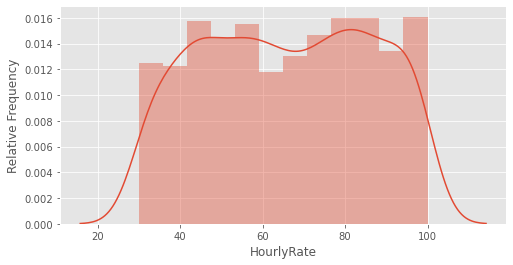

Mean:  65.89115646258503
Median:  66.0

---------- JobInvolvement ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


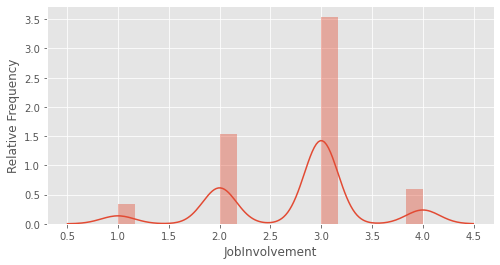

Mean:  2.7299319727891156
Median:  3.0

---------- JobLevel ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


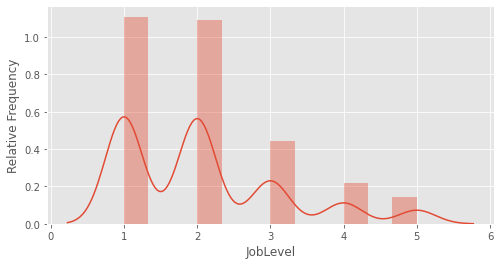

Mean:  2.0639455782312925
Median:  2.0

---------- JobSatisfaction ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


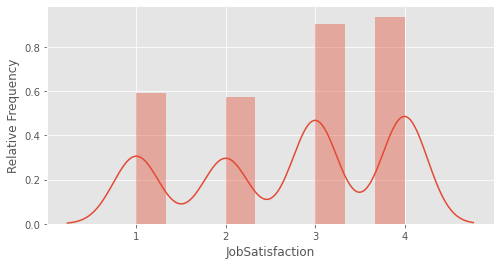

Mean:  2.7285714285714286
Median:  3.0

---------- MonthlyIncome ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


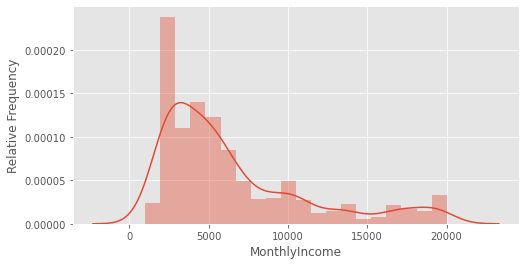

Mean:  6502.931292517007
Median:  4919.0

---------- MonthlyRate ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


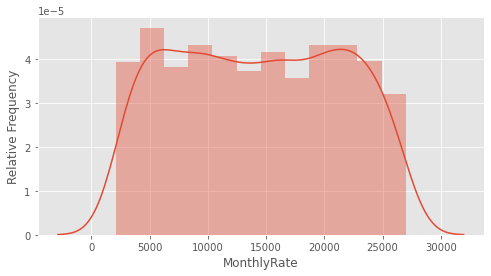

Mean:  14313.103401360544
Median:  14235.5

---------- NumCompaniesWorked ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


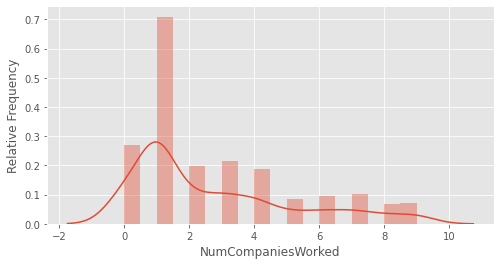

Mean:  2.6931972789115646
Median:  2.0

---------- PercentSalaryHike ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


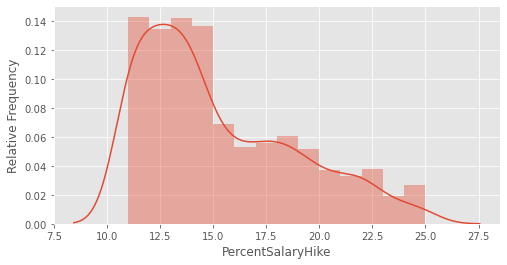

Mean:  15.209523809523809
Median:  14.0

---------- PerformanceRating ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


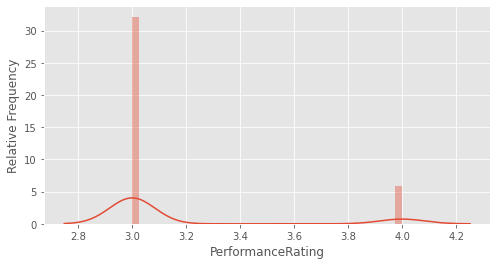

Mean:  3.1537414965986397
Median:  3.0

---------- RelationshipSatisfaction ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


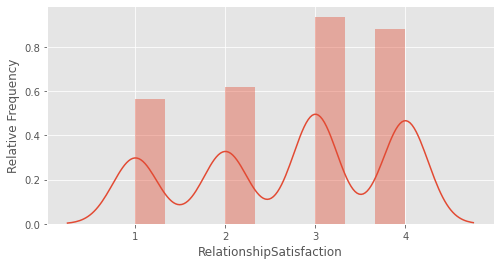

Mean:  2.7122448979591836
Median:  3.0

---------- StandardHours ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


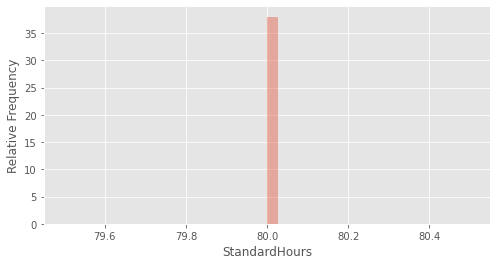

Mean:  80.0
Median:  80.0

---------- StockOptionLevel ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


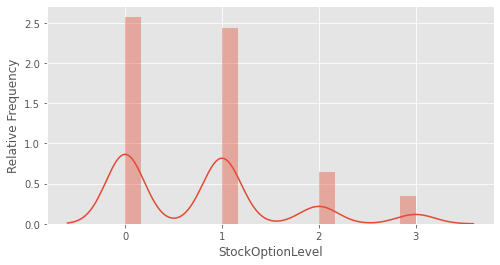

Mean:  0.7938775510204081
Median:  1.0

---------- TotalWorkingYears ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


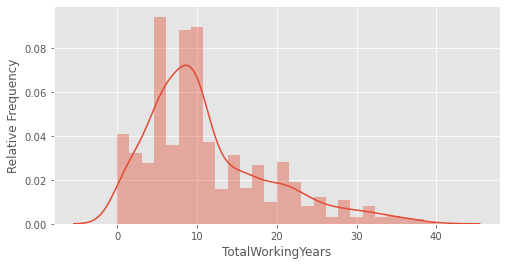

Mean:  11.279591836734694
Median:  10.0

---------- TrainingTimesLastYear ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


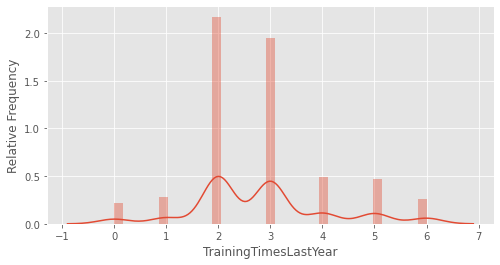

Mean:  2.7993197278911564
Median:  3.0

---------- WorkLifeBalance ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


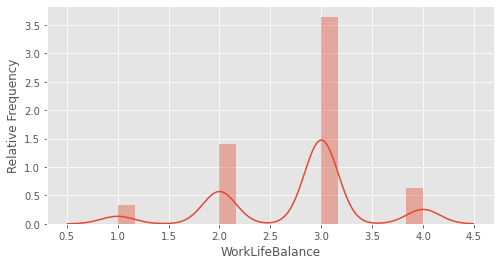

Mean:  2.7612244897959184
Median:  3.0

---------- YearsAtCompany ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


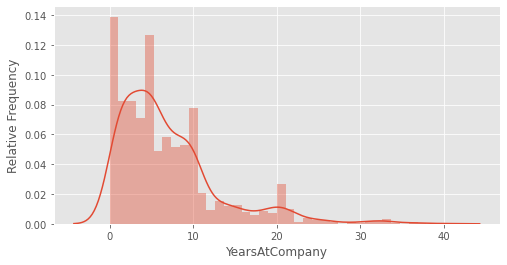

Mean:  7.0081632653061225
Median:  5.0

---------- YearsInCurrentRole ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


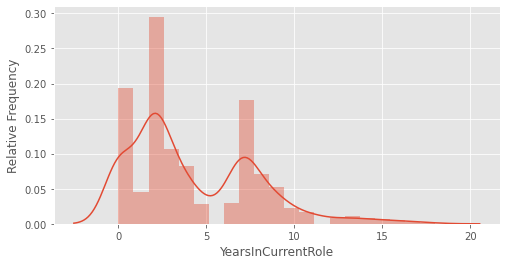

Mean:  4.229251700680272
Median:  3.0

---------- YearsSinceLastPromotion ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


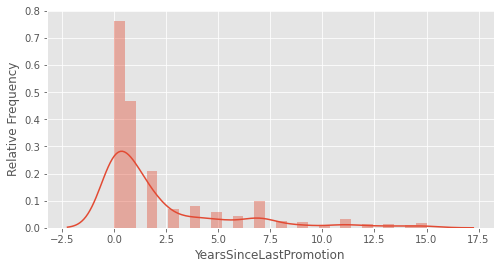

Mean:  2.1877551020408164
Median:  1.0

---------- YearsWithCurrManager ----------


C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


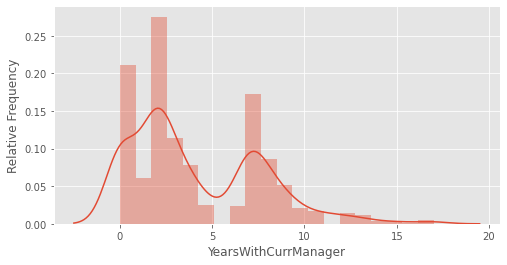

Mean:  4.12312925170068
Median:  3.0



In [18]:
for i in df.describe().columns:
    print("----------",i,"----------")
    plt.figure(figsize=(8, 4))
    sns.distplot(df[i])
    plt.ylabel("Relative Frequency")
    plt.show()
    print("Mean: ", df[i].mean())
    print("Median: ", df[i].median())
    print("")

Insights from Continuous Predictors:
* Most employees are around 36-37 years of age.
* The daily rate follows almost a uniform uniform distribution with mean 802
* Most people travel around 7 km from home but as there are quite a bit of employees traveling far distances, it brings the mean to 9 km. It s highly right-skewed.
* Education is discrete and mean years of experience is 3 years.
* Employee Number seems to be more of a uniform distribution with general count of employees being 1020
* On a 4 point scale generally satisfaction level is 3-4
* Hourly Rate follows a uniform distribution with average hourly rate being 66
* Job Involvement generally seems to be 3 on a 4 point scale which is above average. Most people are involved in their job.
* Job Level is discrete and most people seem to be at 1,2 job levels (they are probably employee who work at lower level roles)
* Job Satisfaction seems seems relatively high with 3-4 being most common on a 4 point scale.
*  General monthly income seems to be around 5000, but considering that there are employees are higher job roles the average income is 6500 rupees.
* Monthly rate also shows a uniform distribution with general figure being 14313.
* Most people have 1 year of work experience. The data being discrete.
* Percentage hike shows a right-skewed distribution, which basically means that most employees get a salary hike of 14% on their previous salary but since the data is highly right-skewed there are quite a few employees getting much higher salary hikes making the average salary hike 15%.
* Most employee have a 3.0 performance rating.
* relationship satisfaction is between 3-4 for most employees on a 4 point scale.
* Standard hours is 80 hrs.
* Stock options of most employees is 0 or 1.
* Most people have total working experience of 11 years, considering the data is right-skewed.
* Training Times Last Year is mostly 2-3.
* Most employees have an above average work life balance (3 out of 4)
* Most employees have around 7 years working in the company. 
* Employees have 3-4 years work experience in a current role before they decide to switch. Data is right-skewed.
* Most employees get a promotion in 1-2 years time.
* Most employees have 3-4 years working with their current manager.

C:\Users\Lenovo\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


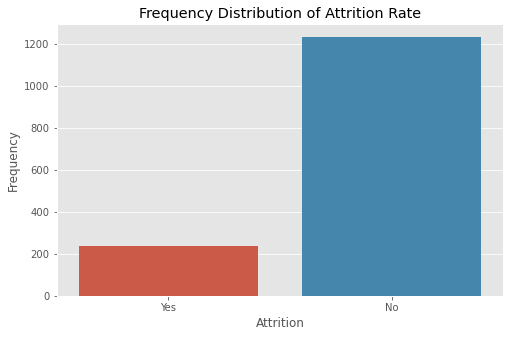

In [19]:
# target variable: Attrition

plt.figure(figsize=(8, 5))
sns.countplot(df["Attrition"])
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Attrition Rate")
plt.show()

Observations:
* We see that the target variable, Attrition has majority of values of 0 (No Attrition)
* Which means that the class is imbalanced. 
* We need to balance it using class weights / Upsampling: SMOTE, so that we can train our model properly on the target labels so that the model can effetively predict the target labels .

### Ordinal

In [20]:
# We will use replace() rather than LabelEncoder() to handle Ordinal data as we will have more control on the data.
df["BusinessTravel"].replace(to_replace=["Non-Travel", "Travel_Rarely", "Travel_Frequently"], value=[0,1,2], inplace=True)

In [21]:
df["BusinessTravel"].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

### Nominal

In [22]:
# We can use the replace() to convert "Y" to 1 in Over18 and for OverTime
df["Over18"].replace({"Y":1}, inplace=True)

In [23]:
df["Over18"].value_counts()

1    1470
Name: Over18, dtype: int64

In [24]:
df["OverTime"].replace({"No":0, "Yes":1}, inplace=True)

In [25]:
df["OverTime"].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [26]:
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True)

In [27]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [28]:
df["Gender"].replace({"Male":0, "Female":1}, inplace=True)

In [29]:
df["Gender"].value_counts()

0    882
1    588
Name: Gender, dtype: int64

In [30]:
# We are left with Department, EducationField and JobRole, MaritalStatus
# These Nominal Features have multiple levels, so we will use One Hot Encoding to handle them.
# We use drop_first=true to avoid curse of dimensionality.

In [31]:
df1 = pd.get_dummies(data=df, columns=["Department", "EducationField", "MaritalStatus", "JobRole"], drop_first=True)
df1.head(10)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,49,0,2,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,37,1,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,33,0,2,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,27,0,1,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
5,32,0,2,1005,2,2,1,8,4,0,79,3,1,4,3068,11864,0,1,0,13,3,3,80,0,8,2,2,7,7,3,6,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
6,59,0,1,1324,3,3,1,10,3,1,81,4,1,1,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
7,30,0,1,1358,24,1,1,11,4,0,67,3,1,3,2693,13335,1,1,0,22,4,2,80,1,1,2,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,38,0,2,216,23,3,1,12,4,0,44,2,3,3,9526,8787,0,1,0,21,4,2,80,0,10,2,3,9,7,1,8,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,36,0,1,1299,27,3,1,13,3,0,94,3,2,3,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


# Multi-Variate Analysis

In [32]:
# correlation between variables of type "int64" or "float64"
corr = df1.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.017883,-0.027549,0.016824,0.038162,-0.006354,-0.041466,-0.027604,0.083919,-0.119185,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.085293,0.080855,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.090984,0.175419,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,NaN,-0.018538,-0.011310,0.044896,-0.004164,0.029300,-0.011696,0.008666,-0.013450,-0.008440,-0.030743,NaN,0.042752,-0.025727,0.001683,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229,0.005308,-0.004261,0.019860,0.005201,-0.011245,-0.000470,-0.019699,0.002198,0.023017,0.010435,0.002094,-0.039312,0.014893,-0.005138,0.002477,-0.025131,0.059995
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.014871,-0.003616,0.004028,-0.064449,0.034202,-0.003893,0.030869,0.040035,-0.075835,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.008117,0.014085,-0.024499,0.039294,0.013486,-0.007969,-0.014802,0.030232,-0.027445,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994
Education,0.208034,-0.031373,-0.008670,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.018604,0.014215,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.001865,0.004168,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.018538,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,-0.022556,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.0

In [33]:
# np.zeros_like() returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr, dtype=np.bool)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
# we set the upper values of the triangle to True
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]

array([ True,  True,  True, ...,  True,  True,  True])

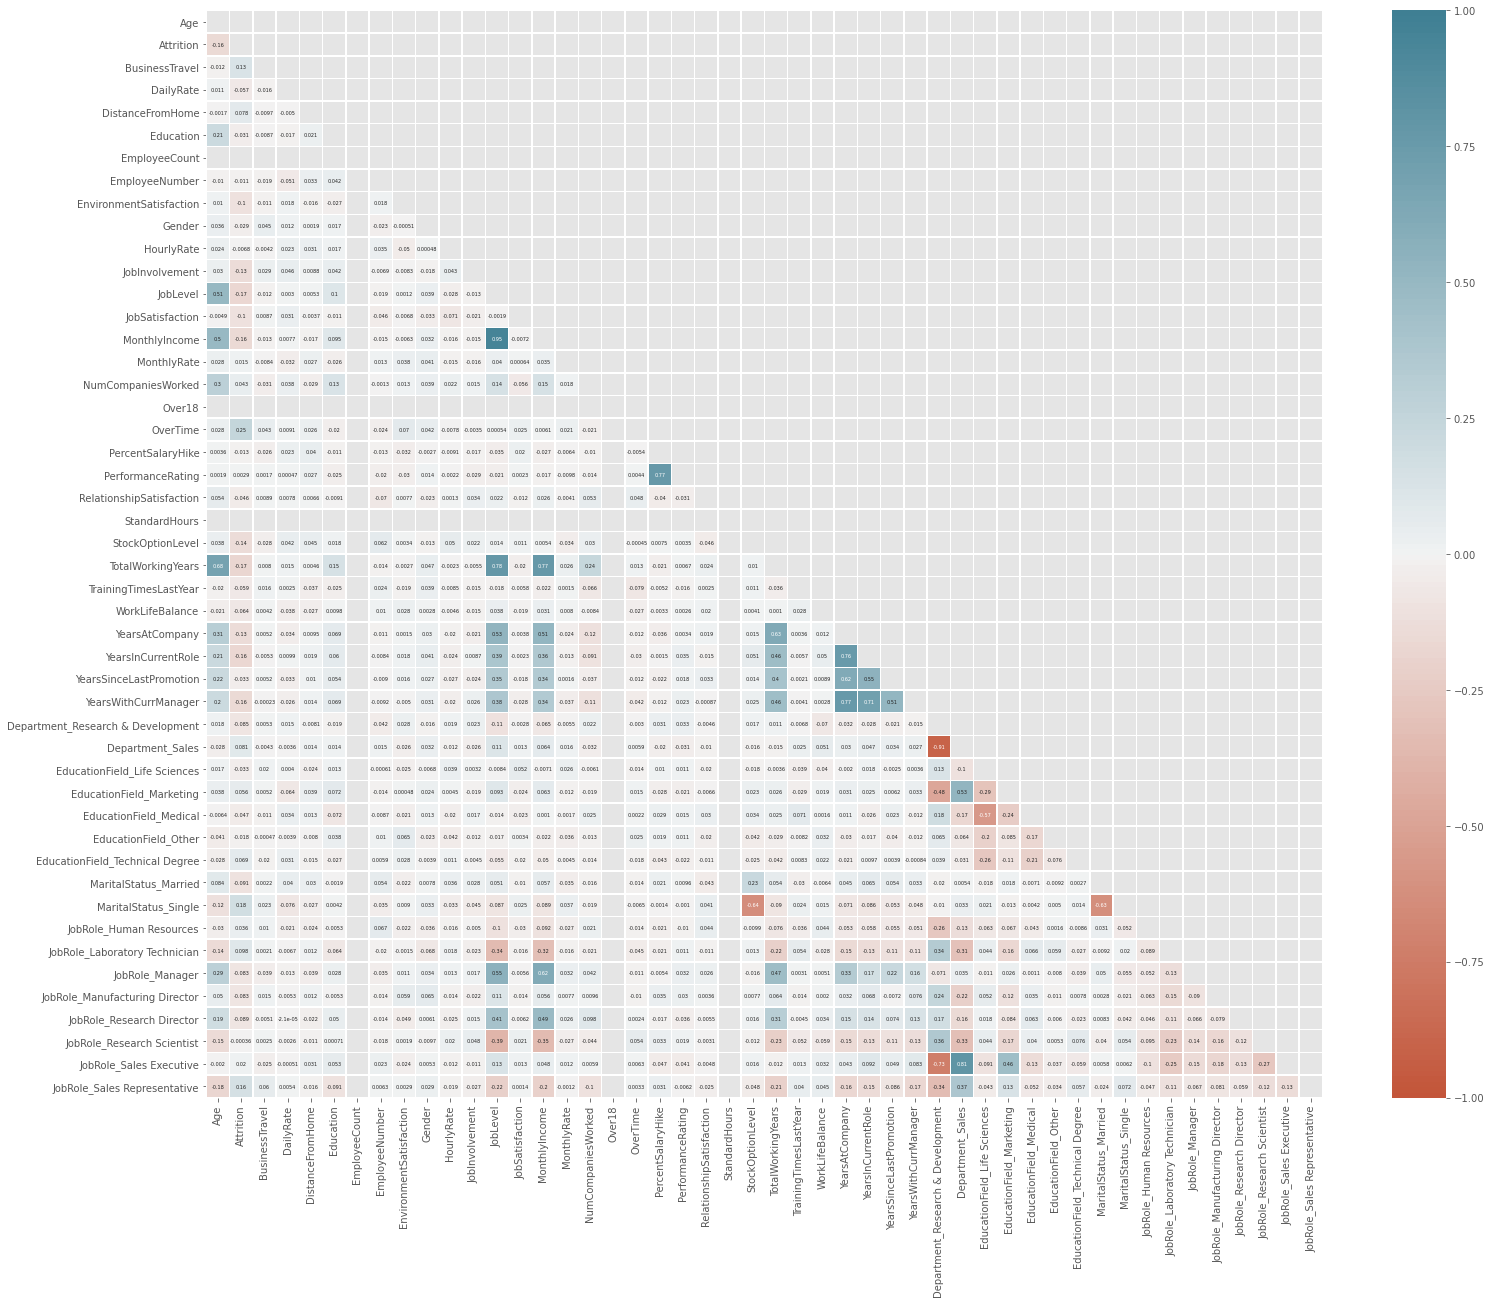

In [35]:
plt.figure(figsize=(25,20))
ax = sns.heatmap(corr,
                      mask = mask,
                      #square = True,
                      linewidths = .5,
                      #cmap = 'coolwarm',
                      cmap=sns.diverging_palette(20, 220, n=200),
                      #cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 5})
ax.set_xticklabels(ax.get_xticklabels());
ax.set_yticklabels(ax.get_yticklabels());

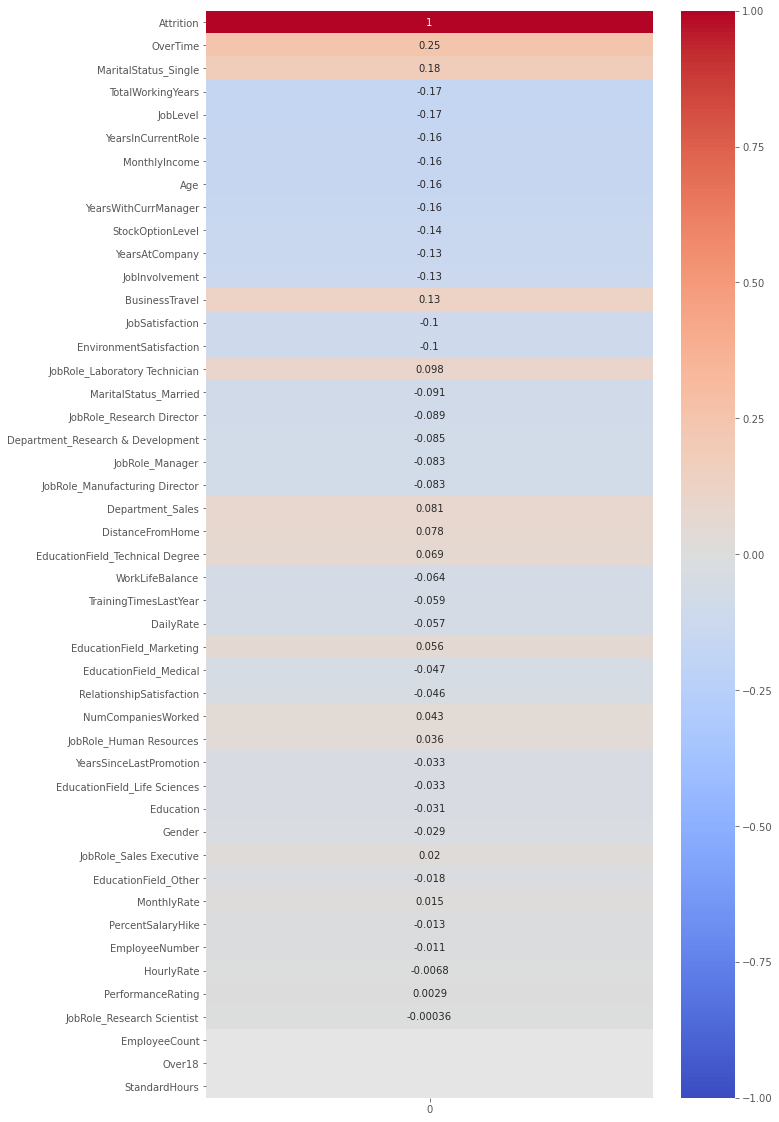

In [36]:
correlations = df1.corrwith(df1['Attrition']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

# Outliers

-------------------- Age --------------------


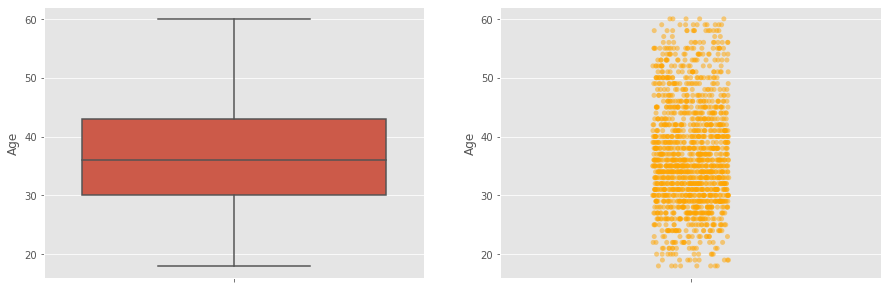


-------------------- Attrition --------------------


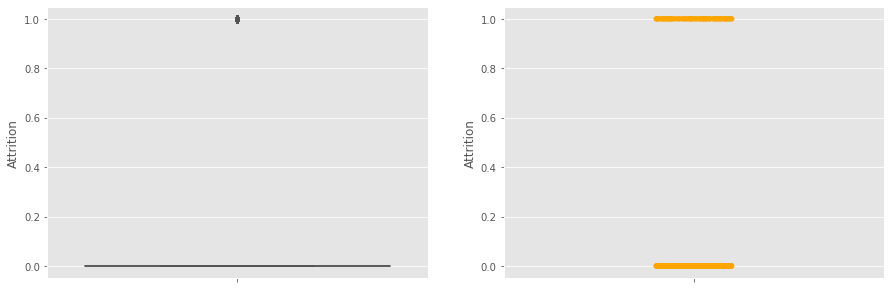


-------------------- BusinessTravel --------------------


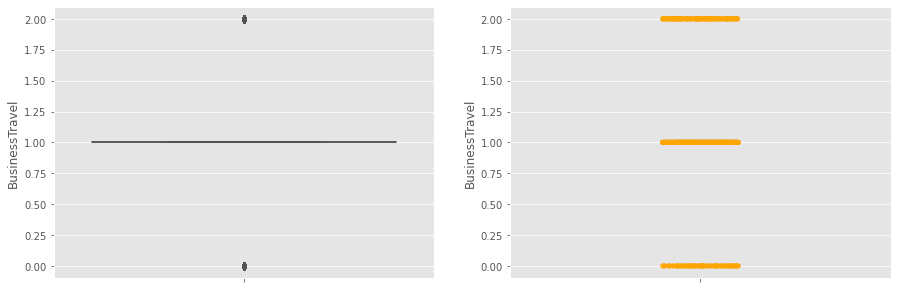


-------------------- DailyRate --------------------


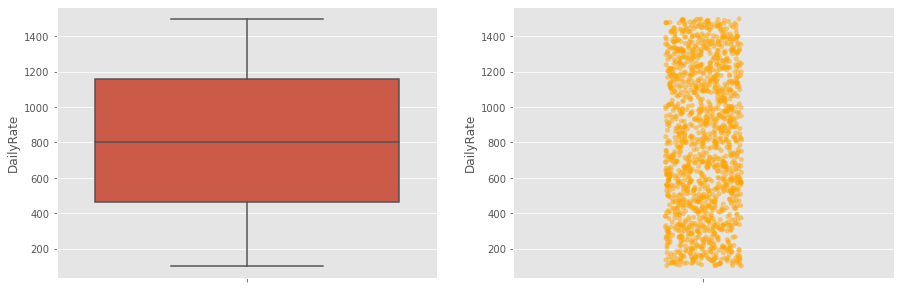


-------------------- DistanceFromHome --------------------


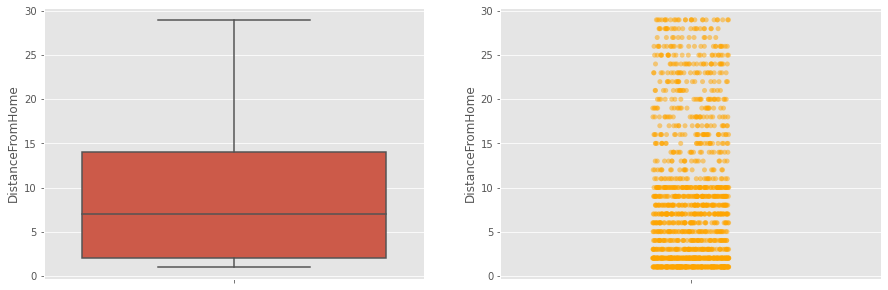


-------------------- Education --------------------


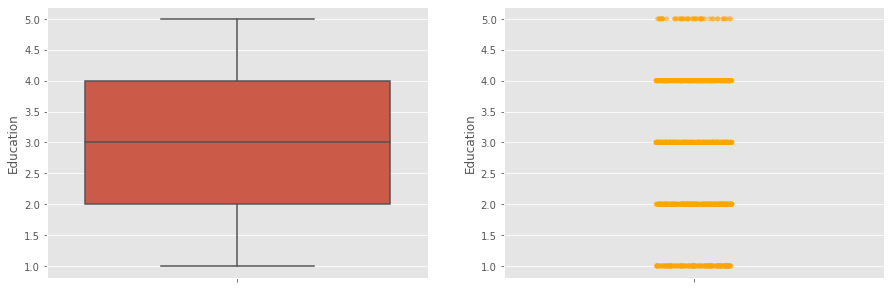


-------------------- EmployeeCount --------------------


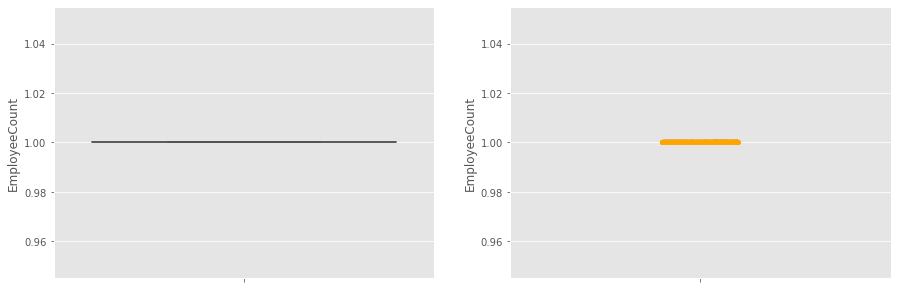


-------------------- EmployeeNumber --------------------


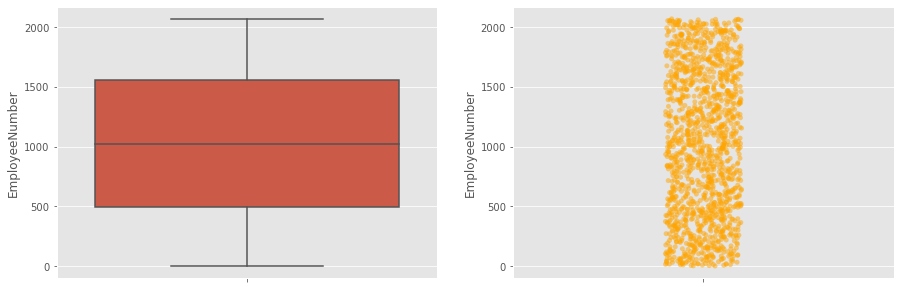


-------------------- EnvironmentSatisfaction --------------------


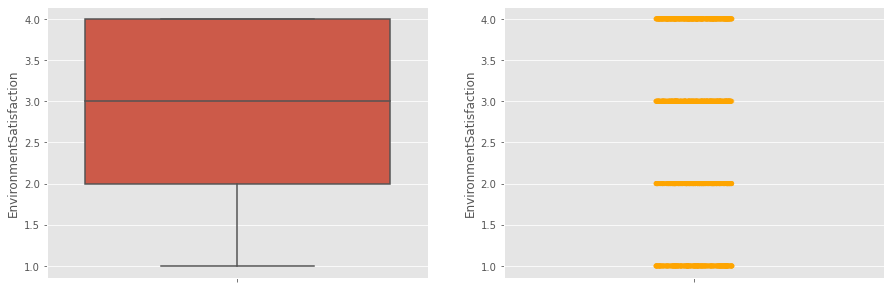


-------------------- Gender --------------------


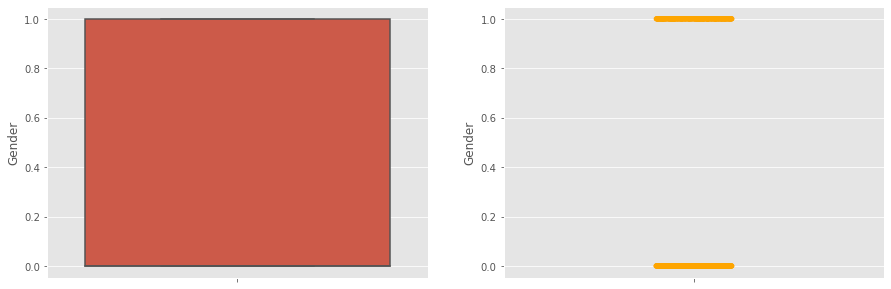


-------------------- HourlyRate --------------------


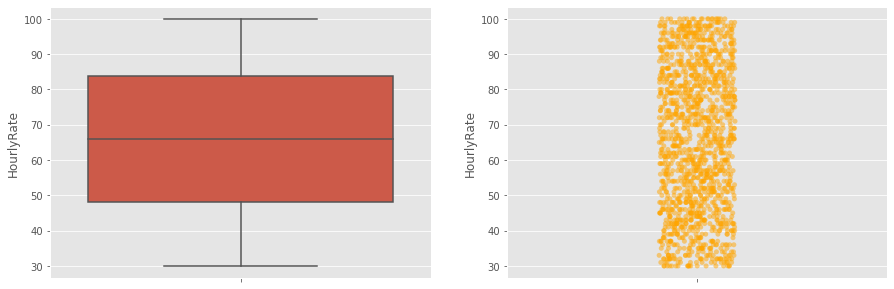


-------------------- JobInvolvement --------------------


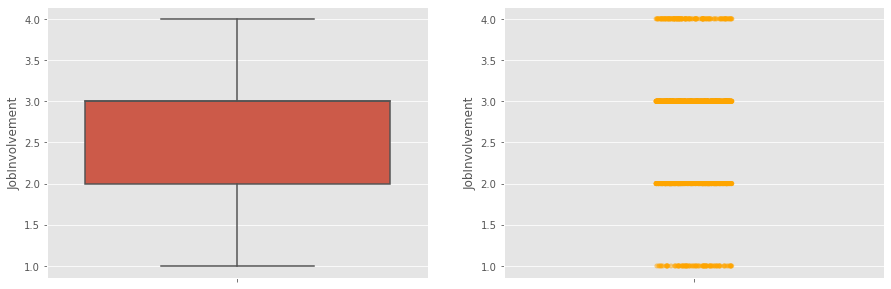


-------------------- JobLevel --------------------


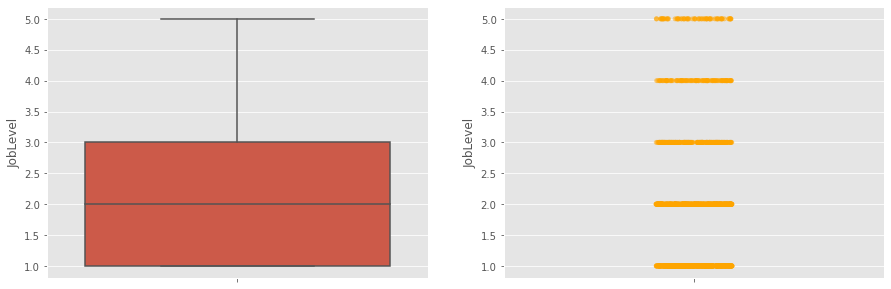


-------------------- JobSatisfaction --------------------


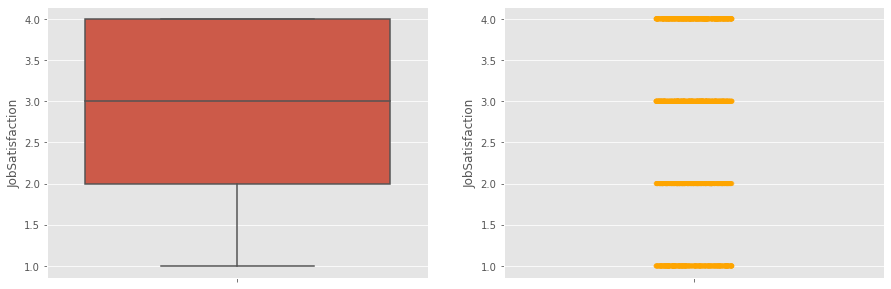


-------------------- MonthlyIncome --------------------


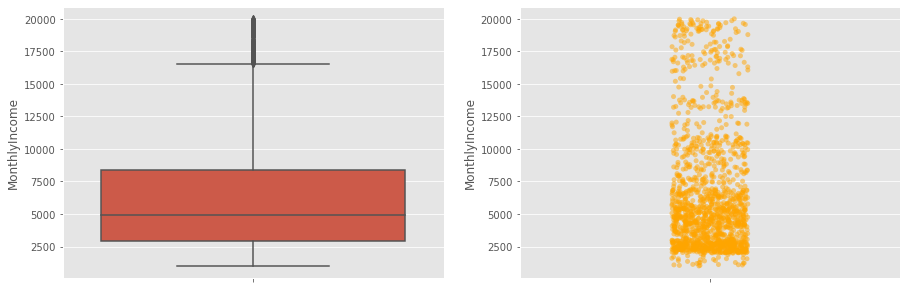


-------------------- MonthlyRate --------------------


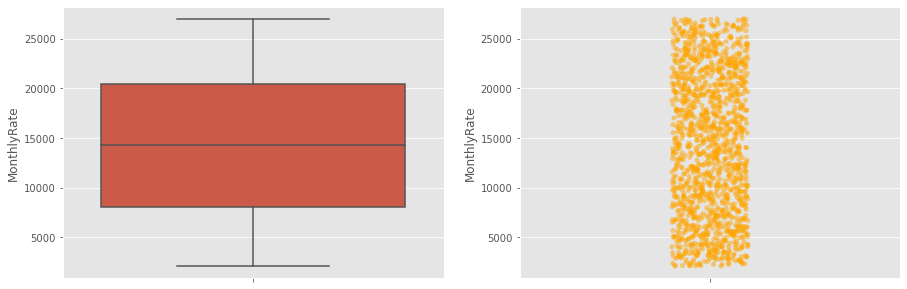


-------------------- NumCompaniesWorked --------------------


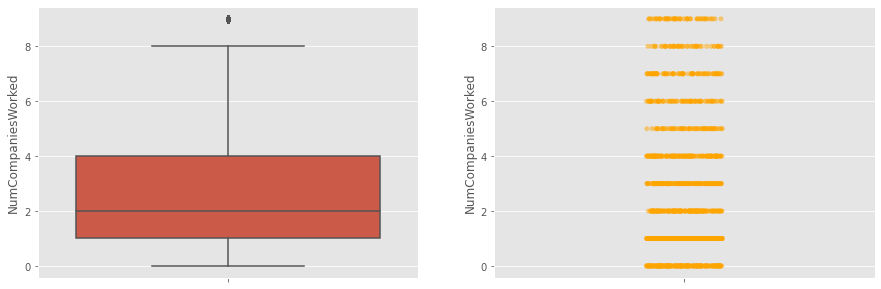


-------------------- Over18 --------------------


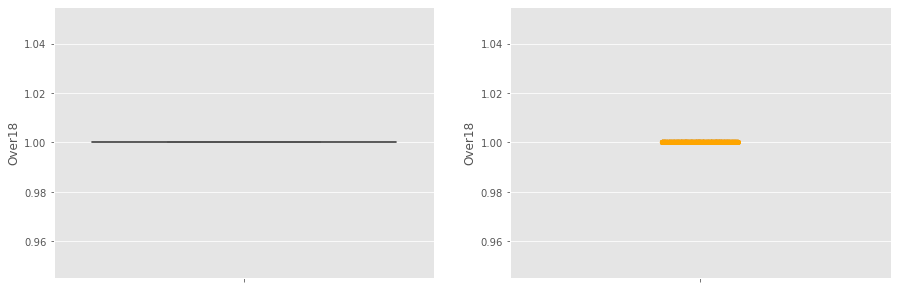


-------------------- OverTime --------------------


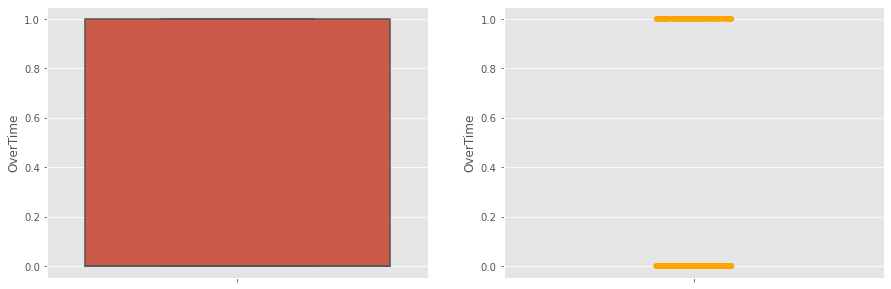


-------------------- PercentSalaryHike --------------------


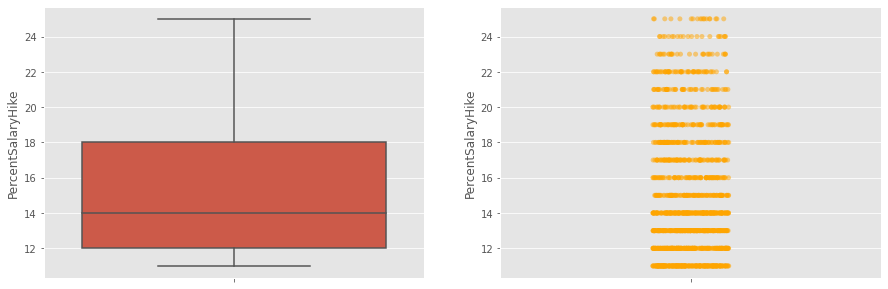


-------------------- PerformanceRating --------------------


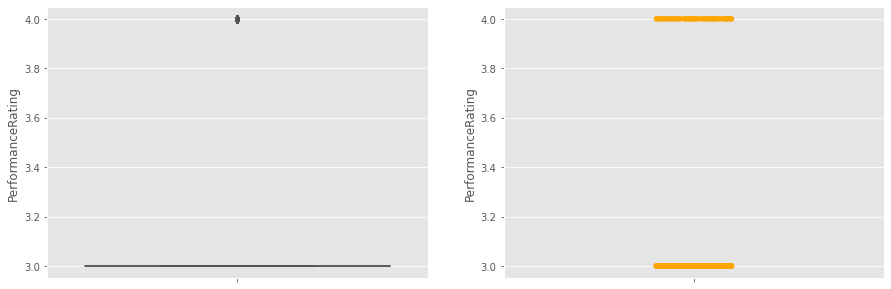


-------------------- RelationshipSatisfaction --------------------


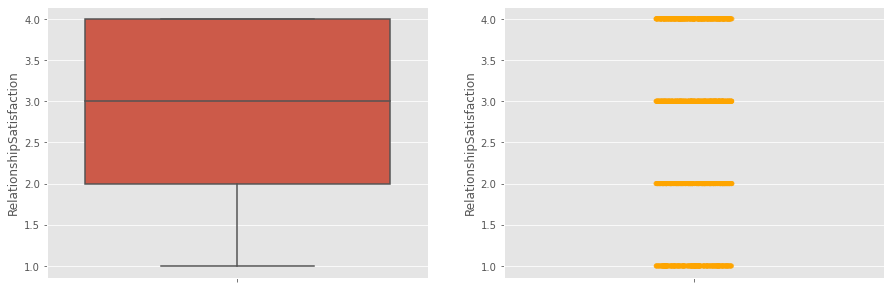


-------------------- StandardHours --------------------


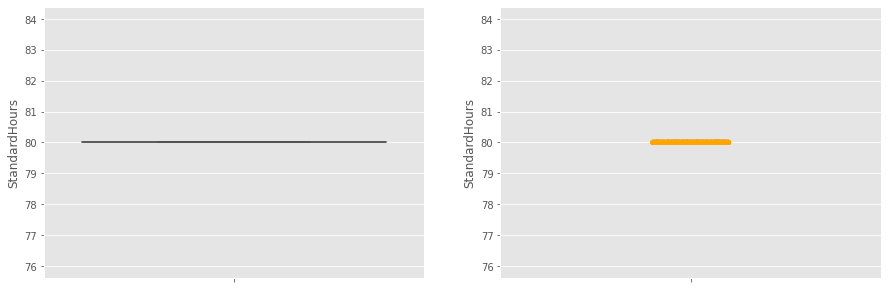


-------------------- StockOptionLevel --------------------


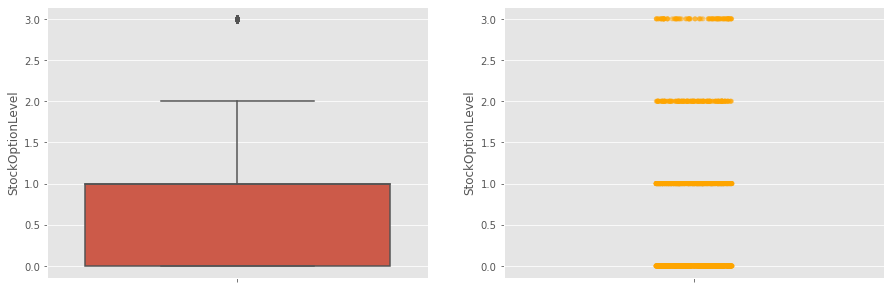


-------------------- TotalWorkingYears --------------------


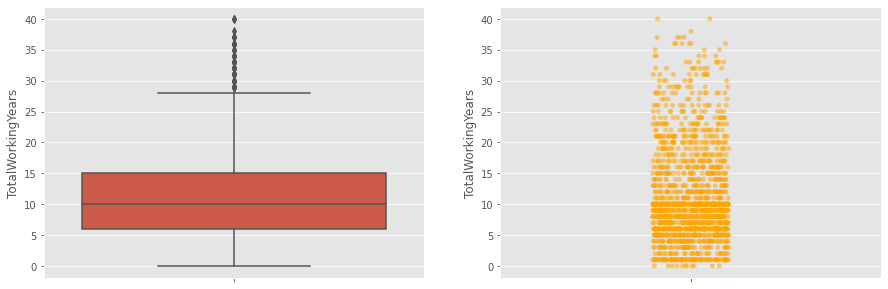


-------------------- TrainingTimesLastYear --------------------


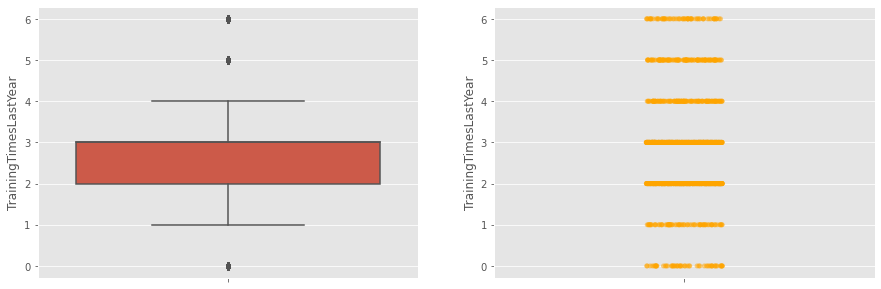


-------------------- WorkLifeBalance --------------------


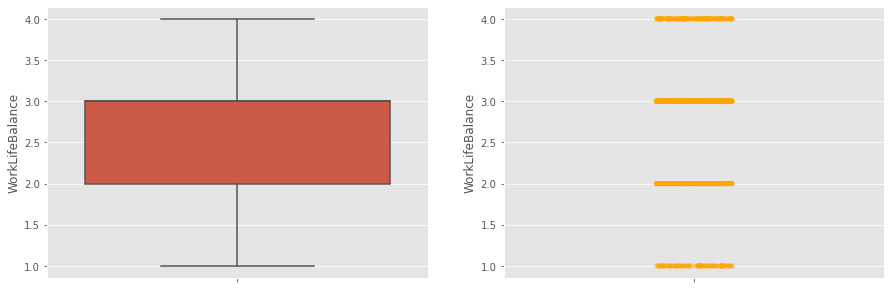


-------------------- YearsAtCompany --------------------


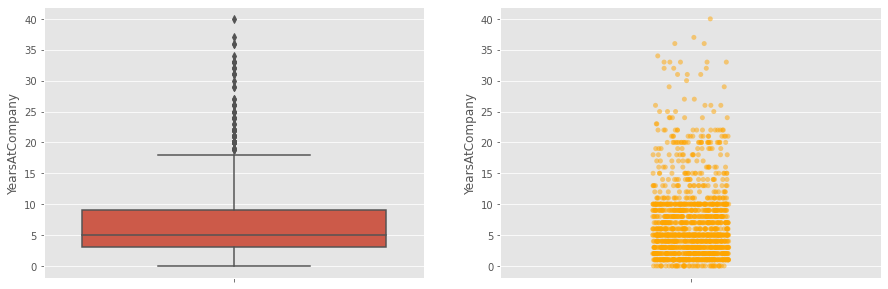


-------------------- YearsInCurrentRole --------------------


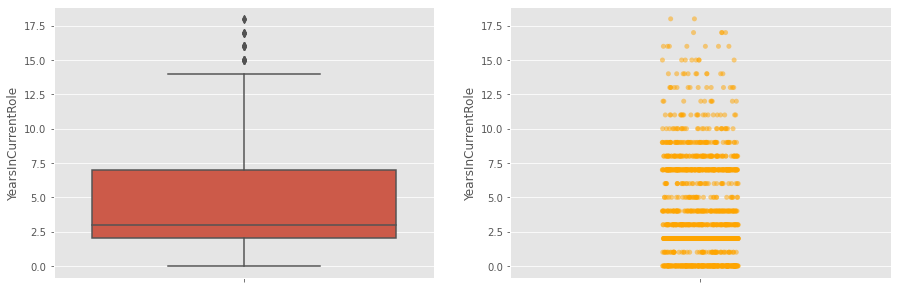


-------------------- YearsSinceLastPromotion --------------------


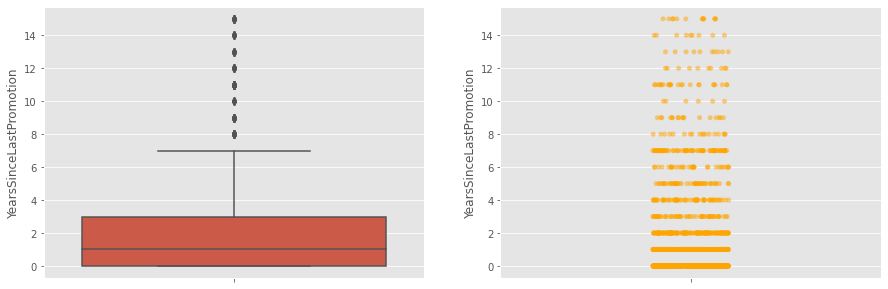


-------------------- YearsWithCurrManager --------------------


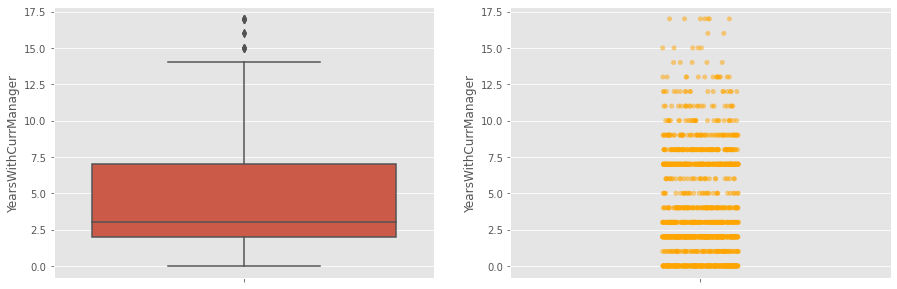


-------------------- Department_Research & Development --------------------


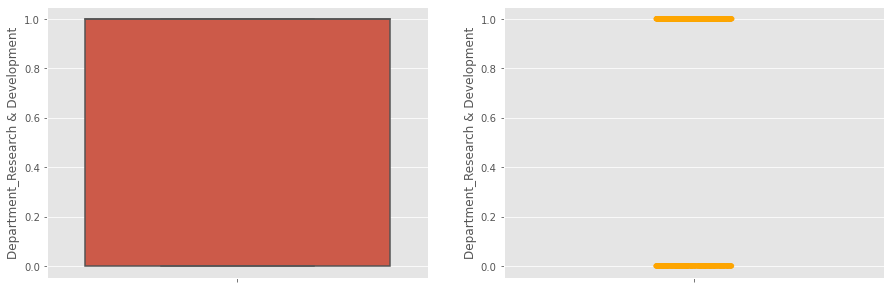


-------------------- Department_Sales --------------------


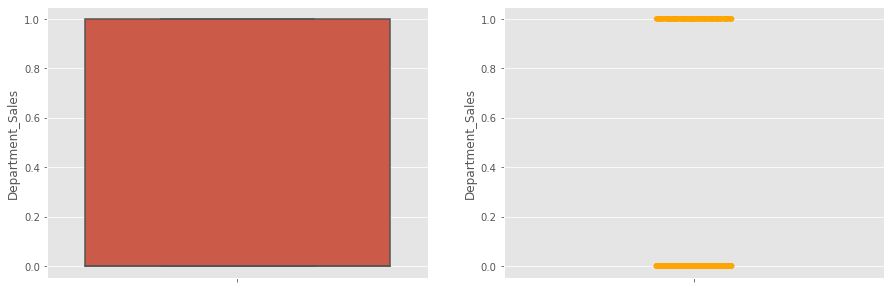


-------------------- EducationField_Life Sciences --------------------


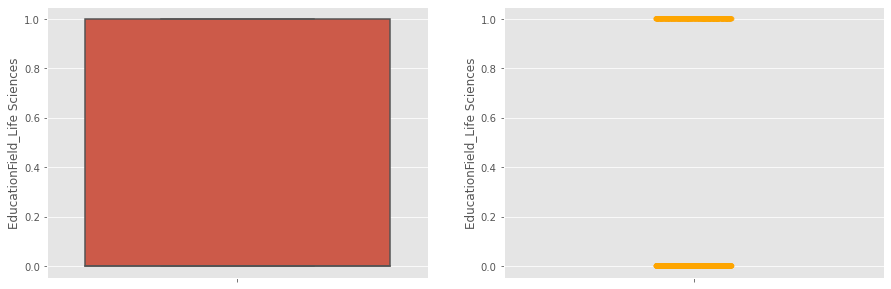


-------------------- EducationField_Marketing --------------------


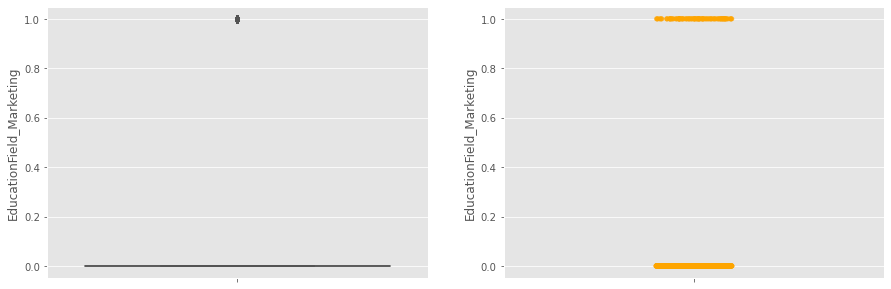


-------------------- EducationField_Medical --------------------


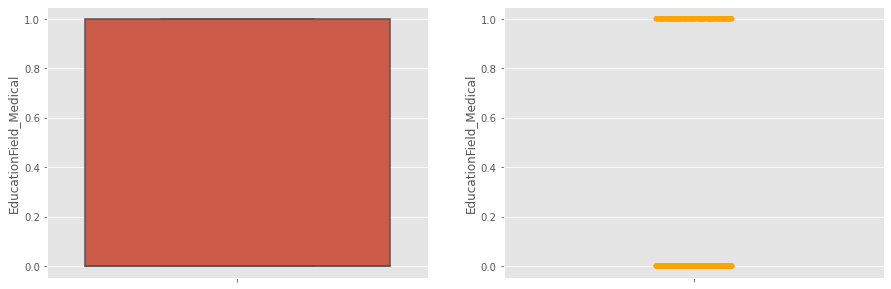


-------------------- EducationField_Other --------------------


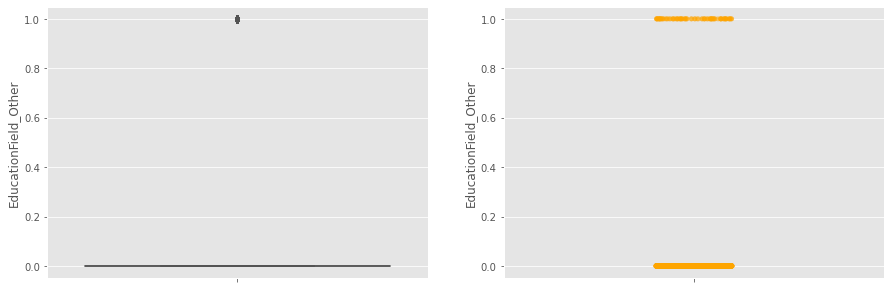


-------------------- EducationField_Technical Degree --------------------


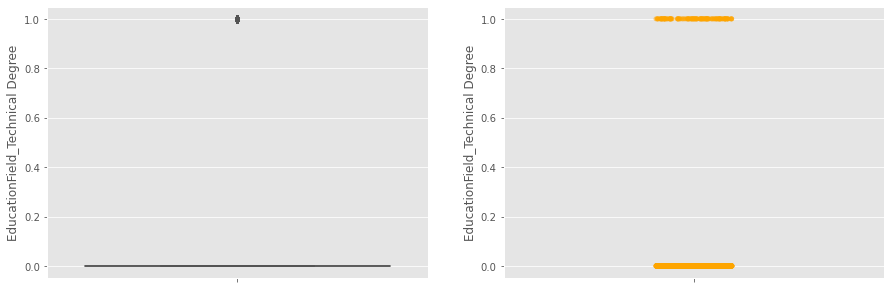


-------------------- MaritalStatus_Married --------------------


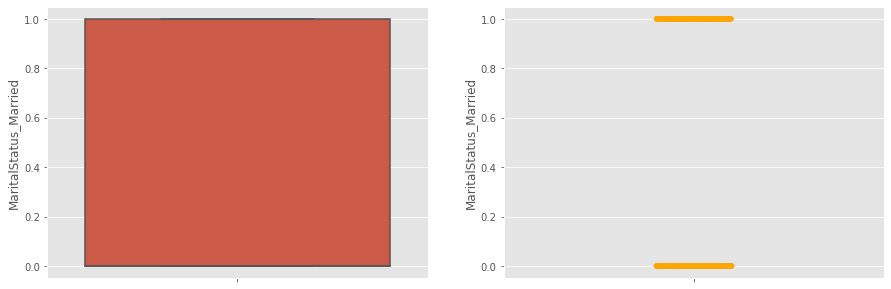


-------------------- MaritalStatus_Single --------------------


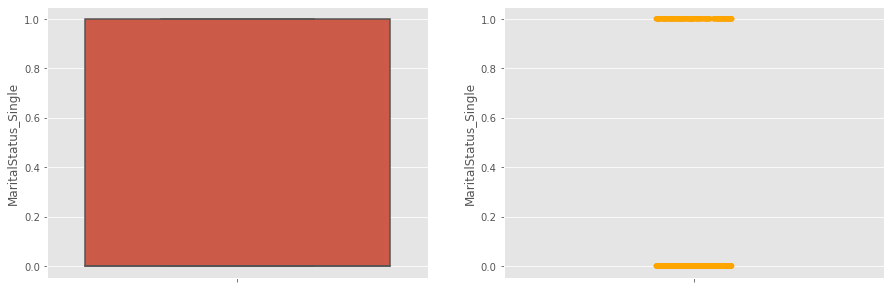


-------------------- JobRole_Human Resources --------------------


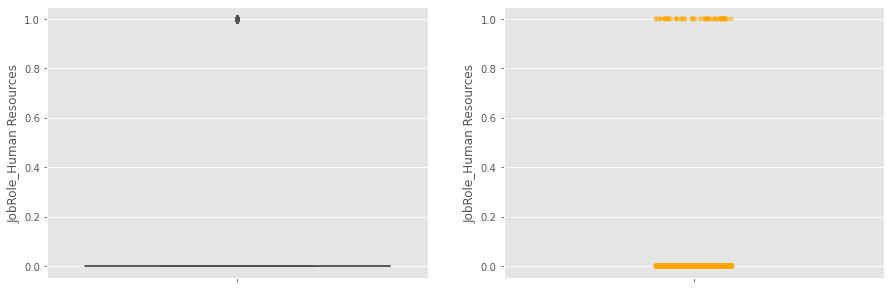


-------------------- JobRole_Laboratory Technician --------------------


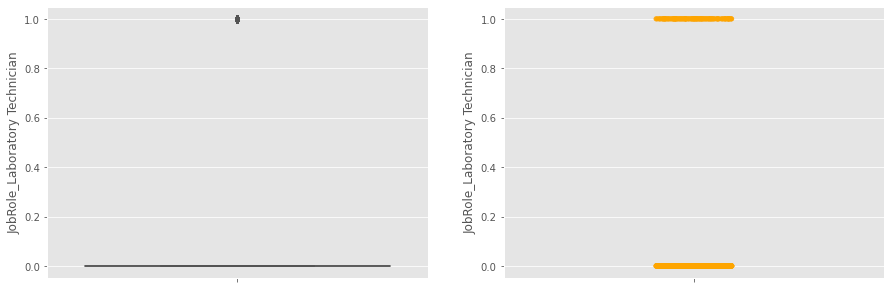


-------------------- JobRole_Manager --------------------


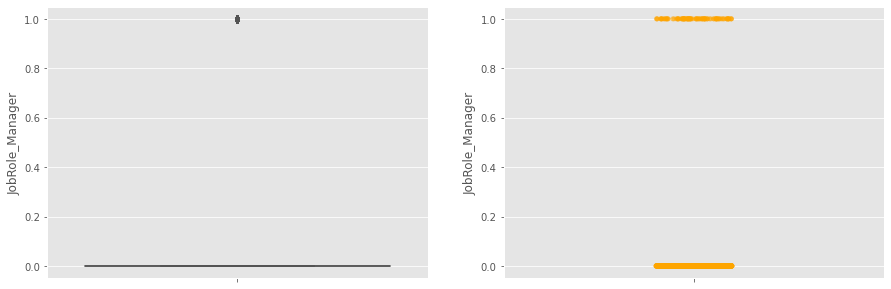


-------------------- JobRole_Manufacturing Director --------------------


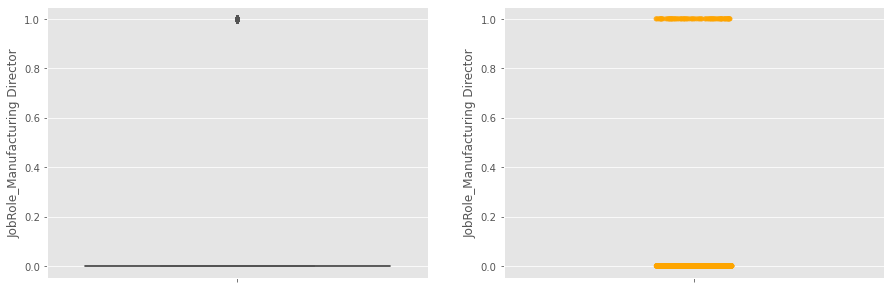


-------------------- JobRole_Research Director --------------------


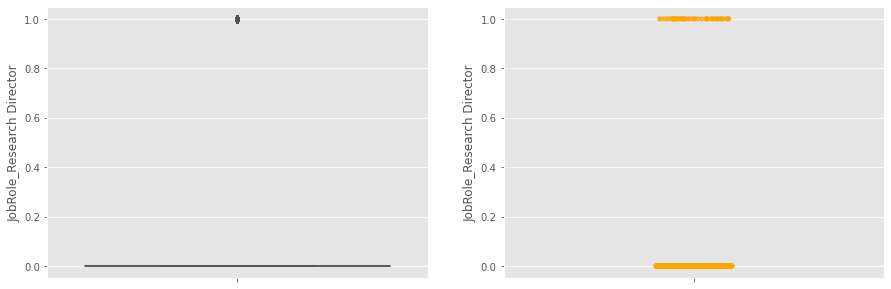


-------------------- JobRole_Research Scientist --------------------


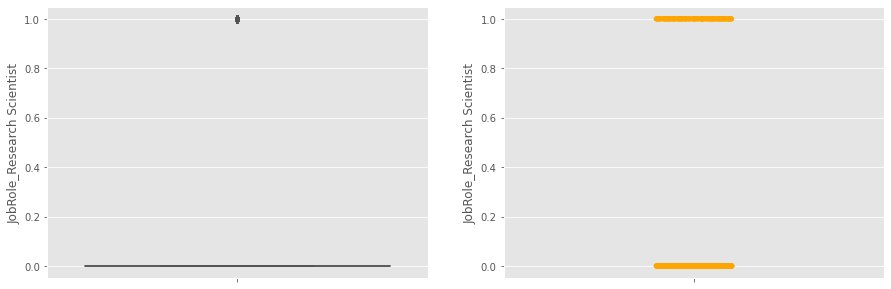


-------------------- JobRole_Sales Executive --------------------


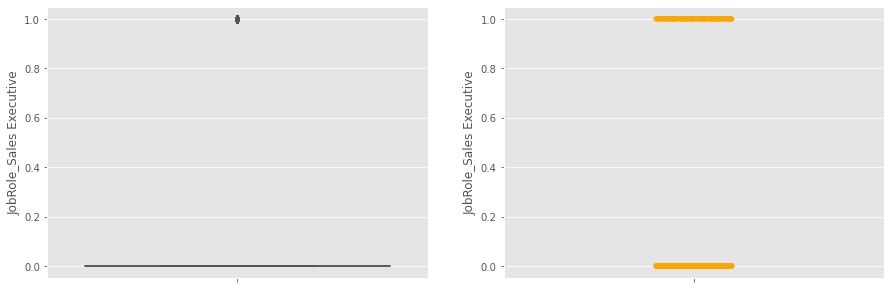


-------------------- JobRole_Sales Representative --------------------


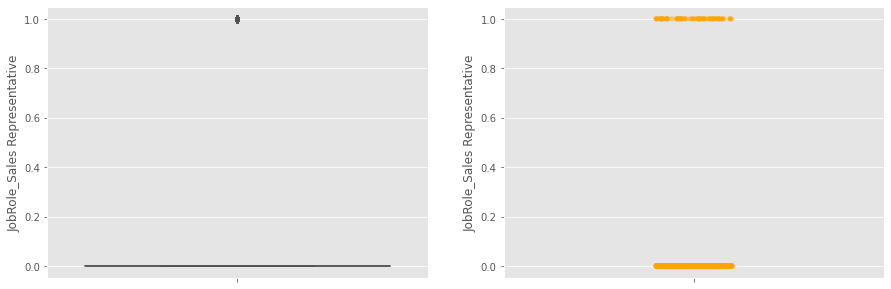

In [37]:
# show 2 graphs at the same time using subplots

for column in df1.corr().columns:
    print("--------------------",column,"--------------------")
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(y=column, data=df1, ax=axes[0])
    sns.stripplot(y=column, data=df1, jitter=True, dodge=True, marker='o', alpha=0.5, color="orange", ax=axes[1])
    plt.show()
    print("")

In [38]:
df_i = df1.copy()
df_i.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,49,0,2,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,37,1,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,33,0,2,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,27,0,1,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [39]:
df_i.shape

(1470, 48)

In [40]:
# Inter-Quartile range for each column
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(IQR)

Age                                     13.00
Attrition                                0.00
BusinessTravel                           0.00
DailyRate                              692.00
DistanceFromHome                        12.00
Education                                2.00
EmployeeCount                            0.00
EmployeeNumber                        1064.50
EnvironmentSatisfaction                  2.00
Gender                                   1.00
HourlyRate                              35.75
JobInvolvement                           1.00
JobLevel                                 2.00
JobSatisfaction                          2.00
MonthlyIncome                         5468.00
MonthlyRate                          12414.50
NumCompaniesWorked                       3.00
Over18                                   0.00
OverTime                                 1.00
PercentSalaryHike                        6.00
PerformanceRating                        0.00
RelationshipSatisfaction          

In [41]:
# The columns having non 0, 1 columns are the continuous columns which need to be considered for outlier detection.

In [42]:
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
df_i = df_i[~((df_i < lower_range) | (df_i > upper_range)).any(axis=1)]
df_i.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
9,36,0,1,1299,27,3,1,13,3,0,94,3,2,3,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
163,57,0,1,334,24,2,1,223,3,0,83,4,3,4,9439,23402,3,1,1,16,3,2,80,1,12,2,1,5,3,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
209,46,0,1,644,1,4,1,288,4,0,97,3,3,1,9396,12368,7,1,0,16,3,3,80,1,17,3,3,4,2,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
302,28,0,1,1476,16,2,1,412,2,0,68,4,2,1,5661,4824,0,1,0,19,3,3,80,0,9,2,3,8,3,0,7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
333,43,0,1,1001,7,3,1,451,3,1,43,3,3,1,9985,9262,8,1,0,16,3,1,80,1,10,1,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
df_i.shape

(41, 48)

In [44]:
# We see that most of our data is removed, hence we wont remove the outliers, as they might be important.

# Sampling (Train and Test)

In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
X = df1.drop("Attrition", axis=1)
y = df1["Attrition"]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.446350,-0.162399,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.224745,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,0.0,1.591746,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.918921,1.458650,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625
1,1.322365,1.717339,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.816497,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,0.0,-0.628241,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.088232,-0.685565,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625
2,0.008343,-0.162399,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,-0.816497,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,0.0,1.591746,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.918921,1.458650,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625
3,-0.429664,1.717339,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,1.224745,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,0.0,1.591746,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.088232,-0.685565,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625
4,-1.086676,-0.162399,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-0.816497,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,0.0,-0.628241,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,1.088232,-0.685565,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=0)

In [49]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1176, 47)
y_train:  (1176,)
--------------------
X_test:  (294, 47)
y_test:  (294,)


# Modelling

## Base Models

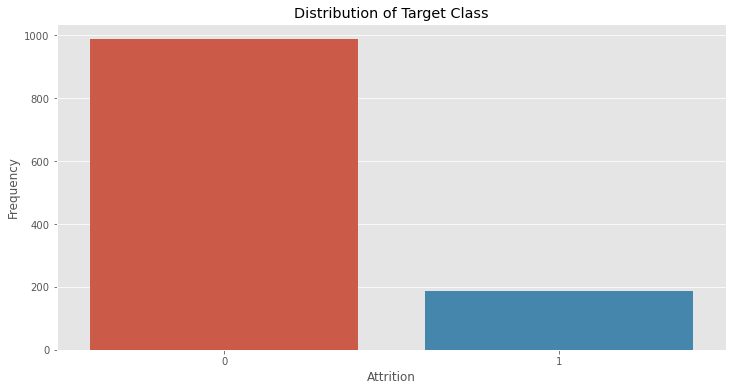

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(y_train)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [51]:
y_train.value_counts()

0    988
1    188
Name: Attrition, dtype: int64

In [52]:
# The target class is imbalanced, let us first use the inbuilt model hyperparameter class_weight to balance the target labels.

In [53]:
# Importing the Keras libraries and packages

import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
#Initializing Neural Network

# We need Sequential module for initializing NN and dense module to add Hidden Layers.
classifier = Sequential()

In [55]:
X_train.shape

(1176, 47)

__units:__ It is simply the number of nodes you want to add to this layer

__kernel_initializer__ is the initialization of Stochastic Gradient Decent. In Neural Network we need to assign weights to each mode which is nothing but importance of that node. At the time of initialization, weights should be close to 0 and we will randomly initialize weights using uniform function

__input_dim:__ Parameter is needed only for first layer as model doesn’t know the number of our input variables. In the second layer model automatically knows the number of input variable from the first hidden layer.

__Activation Function:__
Very important to understand. Neuron applies activation function to weighted sum(summation of Wi * Xi where w is weight, X is input variable and i is suffix of W and X). The closer the activation function value to 1 the more activated is the neuron and more the neuron passes the signal. Which activation function should be used is critical task. Here we are using rectifier(relu) function in our hidden layer and Sigmoid function in our output layer as we want binary result from output layer but if the number of categories in output layer is more than 2 then use SoftMax function.

In [56]:
# Adding the input layer and the first hidden layer

# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 47))
# classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 47))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 47))


# Adding the second hidden layer
# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

First argument is __Optimizer__, this is nothing but the algorithm you wanna use to find optimal set of weights (Note: we just initialized weights now we are applying some sort of algorithm which will optimize weights in turn making out neural network more powerful. This algorithm is __Stochastic Gradient descent(SGD)__. Among several types of SGD algorithm the one which we will use is __‘Adam’__. If you go in deeper detail of SGD, you will find that SGD depends on loss thus our second parameter is loss. Since out dependent variable is binary, we will have to use logarithmic loss function called __‘binary_crossentropy’__, if our dependent variable has more than 2 categories in output then use __‘categorical_crossentropy’__. We want to improve performance of our neural network based on accuracy so add metrics as accuracy.

In [57]:
# Compiling Neural Network

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

We will now train our model on training data but before that we need to fit() it. We will be optimizing our weights to improve model efficiency so when are we updating our weights? 

Batch size is used to specify the number of observation after which you want to update weight. Epoch is nothing but the total number of iterations. Choosing the value of batch size and epoch is trial and error there is no specific rule for that.

In [58]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, class_weight="balanced")

Train on 1176 samples
Epoch 1/100
1176/1176 [==============================] - 2s 2ms/sample - loss: 0.6639 - accuracy: 0.8325
Epoch 2/100
1176/1176 [==============================] - 1s 849us/sample - loss: 0.4676 - accuracy: 0.8401
Epoch 3/100
1176/1176 [==============================] - 1s 900us/sample - loss: 0.3689 - accuracy: 0.8401
Epoch 4/100
1176/1176 [==============================] - 1s 876us/sample - loss: 0.3430 - accuracy: 0.8401
Epoch 5/100
1176/1176 [==============================] - 1s 896us/sample - loss: 0.3260 - accuracy: 0.8622
Epoch 6/100
1176/1176 [==============================] - 1s 881us/sample - loss: 0.3118 - accuracy: 0.8852
Epoch 7/100
1176/1176 [==============================] - 1s 887us/sample - loss: 0.3004 - accuracy: 0.8929
Epoch 8/100
1176/1176 [==============================] - 1s 686us/sample - loss: 0.2916 - accuracy: 0.8954
Epoch 9/100
1176/1176 [==============================] - 1s 844us/sample - loss: 0.2828 - accuracy: 0.8988
Epoch 10/100
1176

1176/1176 [==============================] - 1s 852us/sample - loss: 0.1218 - accuracy: 0.9609
Epoch 77/100
1176/1176 [==============================] - 1s 851us/sample - loss: 0.1213 - accuracy: 0.9600
Epoch 78/100
1176/1176 [==============================] - ETA: 0s - loss: 0.1187 - accuracy: 0.96 - 1s 814us/sample - loss: 0.1196 - accuracy: 0.9634
Epoch 79/100
1176/1176 [==============================] - 1s 850us/sample - loss: 0.1185 - accuracy: 0.9575
Epoch 80/100
1176/1176 [==============================] - 1s 862us/sample - loss: 0.1164 - accuracy: 0.9617
Epoch 81/100
1176/1176 [==============================] - 1s 846us/sample - loss: 0.1147 - accuracy: 0.9651
Epoch 82/100
1176/1176 [==============================] - 1s 842us/sample - loss: 0.1151 - accuracy: 0.9575
Epoch 83/100
1176/1176 [==============================] - 1s 848us/sample - loss: 0.1129 - accuracy: 0.9634
Epoch 84/100
1176/1176 [==============================] - 1s 846us/sample - loss: 0.1119 - accuracy: 0.9651

Predicting the test set result. The prediction result will give you probability of the customer leaving the company. We will convert that probability into binary 0 and 1.

In [59]:
# Predicting the Test set results
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

In [60]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)

In [61]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[983,   5],
       [ 19, 169]], dtype=int64)

In [62]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[230,  15],
       [ 31,  18]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

print('\n\nTrain Data: Classification Report\n')
print(classification_report(y_train,y_pred_train))

print('\n\nTest Data: Classification Report\n')
print(classification_report(y_test,y_pred_test))



Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       988
           1       0.97      0.90      0.93       188

    accuracy                           0.98      1176
   macro avg       0.98      0.95      0.96      1176
weighted avg       0.98      0.98      0.98      1176



Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       245
           1       0.55      0.37      0.44        49

    accuracy                           0.84       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.83      0.84      0.83       294



In [ ]:
# Save the model to disk
model.save("trained_model.h5")
print("Model saved to disk.")

# .htf5 is a binary file format used to store python array data